The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies, but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums assured are £1000, £2500, £3000, £5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receives low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but they are looking for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.

To test the effectiveness of the scheme, Titan have taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover). The outputs of the salespeople are shown in Table 1 (captured in titan_sample.csv file)


In [16]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math

#import data
titan = pd.read_csv('titan_sample.csv')
titan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
SALESPERSON                  30 non-null int64
Old Scheme (in thousands)    30 non-null int64
New Scheme (in thousands)    30 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


In [3]:
titan.describe()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
count,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333
std,8.803408,20.455980,24.062395
min,1.000000,28.000000,32.000000
25%,8.250000,54.000000,55.000000
50%,15.500000,67.000000,74.000000
75%,22.750000,81.500000,85.750000
max,30.000000,110.000000,122.000000


Questions
1. Find the mean of old scheme and new scheme column. (5 points)

Old scheme mean:  68.03333333333333
New scheme mean:  72.03333333333333
Scheme difference mean:  4.0
Scheme difference standard deviation:  14.08104619937615


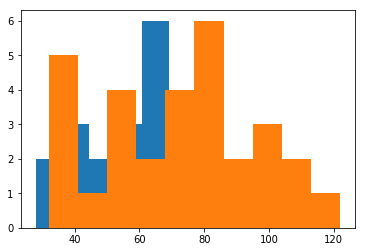

In [11]:
old_mean = titan['Old Scheme (in thousands)'].mean()
new_mean = titan['New Scheme (in thousands)'].mean()
print ("Old scheme mean: ",old_mean)
plt.hist(titan['Old Scheme (in thousands)'])
print ("New scheme mean: ",new_mean)
plt.hist(titan['New Scheme (in thousands)'])
scheme_diff = titan['New Scheme (in thousands)'] - titan['Old Scheme (in thousands)']
diff_mean = scheme_diff.mean()
diff_std_dev = scheme_diff.std()
print ("Scheme difference mean: ", diff_mean)
print ("Scheme difference standard deviation: ", diff_std_dev)



2. Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

In [5]:
#level of significance 
alpha = 0.05
# Sample size N
N = titan['SALESPERSON'].count()
#Degrees of Freedon df
df = N-1
'''
Hypothesis formulation

H0 = old_mean - new_mean = 0 (New Scheme did not raise output significantly)
H1 = old_mean - new_mean <0 (New Scheme raised the output significantly)
'''
print("Alpha = ",alpha, "\nSample Size (N)= ", N, "\nDegrees of Freedom df = ", df)

Alpha =  0.05 
Sample Size (N)=  30 
Degrees of Freedom df =  29


In [18]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(titan['New Scheme (in thousands)'],titan['Old Scheme (in thousands)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=1.556, p=0.131


3. What conclusion does the test (p-value) lead to? (2.5 points)

In [ ]:
# interpret
alpha = 0.05
if p > alpha:
	print(' New Scheme did not raise output significantly (fail to reject H0)')
else:
	print('New Scheme raised the output significantly (reject H0)')


4. Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. 
If this figure is alternative hypothesis, what is:
        a) The probability of a type 1 error? (2.5 points)
        b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)
        c) Power of the test (5 points)

In [ ]:
# H0: Delta (New Scheme Mean - Old Scheme Mean) = 0
# H1: Delta (New Scheme Mean - Old Scheme Mean) = 5000 
# a) The probability of a type 1 error?
print ("Assuming significance level alpha at 5% , probability of Type 1 Error is  0.05")

In [22]:
# b) What is the p- value of the hypothesis test if we test for a difference of $5000?
#old_mean - new_mean = 5000
T_critical = stats.t.ppf(1-0.05, 30)
print ("T critical value is: ",T_critical)
# We fail to reject null hypothesis if we get a T-statistic less than 1.697 for the sample size of 30
# We need to find sample mean until we fail to reject the null hypothesis. Then we need to identify the probability of calculated sample mean x_bar appearing when population mean mu = 5000
# t-stat = (x_bar - mu)/(std_dev/sqrt(n))
# 1.697 = (x_bar -  0 )/(14.081/sqrt(30))
x_bar = T_critical * (diff_std_dev/math.sqrt(N))
print ("x_bar : ",x_bar)

# Given old_mean - new_mean = 5000
# T-stat = (4.37 - 5)/ (14.081/sqrt(30))

T_stat = (x_bar - 5)/(diff_std_dev/math.sqrt(N))
print ("T-stat :",T_stat)
pval = stats.t.sf(np.abs(T_stat), N-1)

print ('t-statistic = %6.3f pvalue = %6.4f' % (T_stat, pval))

T critical value is:  1.6972608943617378
x_bar :  4.363378637308852
T-stat : -0.24763208358130956
t-statistic = -0.248 pvalue = 0.4031


In [24]:
# c) Power of the test 
# Power of hypothesis =  1- P(Type 2 error)
power = 1- pval
print ('Power of hypothesis: %6.3f' % (power))


Power of hypothesis:  0.597
